In [112]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [113]:

workdir = 'Q:/Messdaten/floodVisionData/core_2018_cq/_temp/190326'
# define log file
log_file = os.path.join(workdir, 'results.csv')

In [138]:
data = pd.read_csv(log_file)

In [115]:
data.head(3)

,par_r_surf,par_r_p3,par_r_px,par_cd_m1,par_d_s6,par_cd_r4,error,run_count,cal_err,type,time,meta_event_val,meta_event_cal,meta_observations,meta_source_count,meta_count_sensor,meta_count_trend
0,0.00639,0.010460,0.003725,0.4456,0.08080,0.7295,0.193195,673,-0.2815,calibration,2019-03-26 19:31:44.528667,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3
1,0.00833,0.010315,0.003834,0.4580,0.07855,0.7363,0.195455,818,-0.2817,calibration,2019-03-26 19:31:45.184733,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3
2,0.00607,0.010400,0.003720,0.4500,0.08570,0.7360,0.194475,663,-0.2817,calibration,2019-03-26 19:31:45.860801,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3


In [116]:
id_cols = ['type', 'meta_event_val', 'meta_event_cal', 'meta_count_sensor', 'meta_count_trend']

In [117]:
grouped = data.groupby(id_cols)
grouped.head(3)

,par_r_surf,par_r_p3,par_r_px,par_cd_m1,par_d_s6,par_cd_r4,error,run_count,cal_err,type,time,meta_event_val,meta_event_cal,meta_observations,meta_source_count,meta_count_sensor,meta_count_trend
0,0.006390,0.010460,0.003725,0.4456,0.08080,0.7295,0.193195,673,-0.28150,calibration,2019-03-26 19:31:44.528667,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3
1,0.008330,0.010315,0.003834,0.4580,0.07855,0.7363,0.195455,818,-0.28170,calibration,2019-03-26 19:31:45.184733,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3
2,0.006070,0.010400,0.003720,0.4500,0.08570,0.7360,0.194475,663,-0.28170,calibration,2019-03-26 19:31:45.860801,Event 20,20,s3_trend-s5_trend-s6_trend,3,0,3
50,0.006390,0.010460,0.003725,0.4456,0.08080,0.7295,0.192843,673,-0.28150,validation,2019-03-26 19:32:26.471861,Event 21,20,s3_trend-s5_trend-s6_trend,3,0,3
51,0.008330,0.010315,0.003834,0.4580,0.07855,0.7363,0.195479,818,-0.28170,validation,2019-03-26 19:32:27.115926,Event 21,20,s3_trend-s5_trend-s6_trend,3,0,3
52,0.006070,0.010400,0.003720,0.4500,0.08570,0.7360,0.193645,663,-0.28170,validation,2019-03-26 19:32:27.696984,Event 21,20,s3_trend-s5_trend-s6_trend,3,0,3
100,0.006390,0.010460,0.003725,0.4456,0.08080,0.7295,0.181063,673,-0.28150,validation,2019-03-26 19:33:08.098024,Event 22,20,s3_trend-s5_trend-s6_trend,3,0,3
101,0.008330,0.010315,0.003834,0.4580,0.07855,0.7363,0.183077,818,-0.28170,validation,2019-03-26 19:33:08.873101,Event 22,20,s3_trend-s5_trend-s6_trend,3,0,3
102,0.006070,0.010400,0.003720,0.4500,0.08570,0.7360,0.181764,663,-0.28170,validation,2019-03-26 19:33:09.529167,Event 22,20,s3_trend-s5_trend-s6_trend,3,0,3
150,0.006390,0.010460,0.003725,0.4456,0.08080,0.7295,0.224641,673,-0.28150,validation,2019-03-26 19:33:55.595773,Event 23,20,s3_trend-s5_trend-s6_trend,3,0,3


In [131]:
grouped_stats = pd.melt(grouped.std().reset_index(), id_vars=id_cols, value_name='std')

In [137]:
grouped_stats.head(3)

,type,meta_event_val,meta_event_cal,meta_count_sensor,meta_count_trend,variable,std
0,calibration,Event 20,20,0,1,par_r_surf,0.004864
1,calibration,Event 20,20,0,2,par_r_surf,0.005784
2,calibration,Event 20,20,0,3,par_r_surf,0.002149


In [132]:
grouped_stats['mean'] = list(grouped.mean())

ValueError: Length of values does not match length of index

In [136]:
grouped.mean().shape

(125, 10)

In [129]:
grouped_varcoeff = pd.melt(grouped_std.divide(grouped_mean, fill_value=0).reset_index(), id_vars=id_cols)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

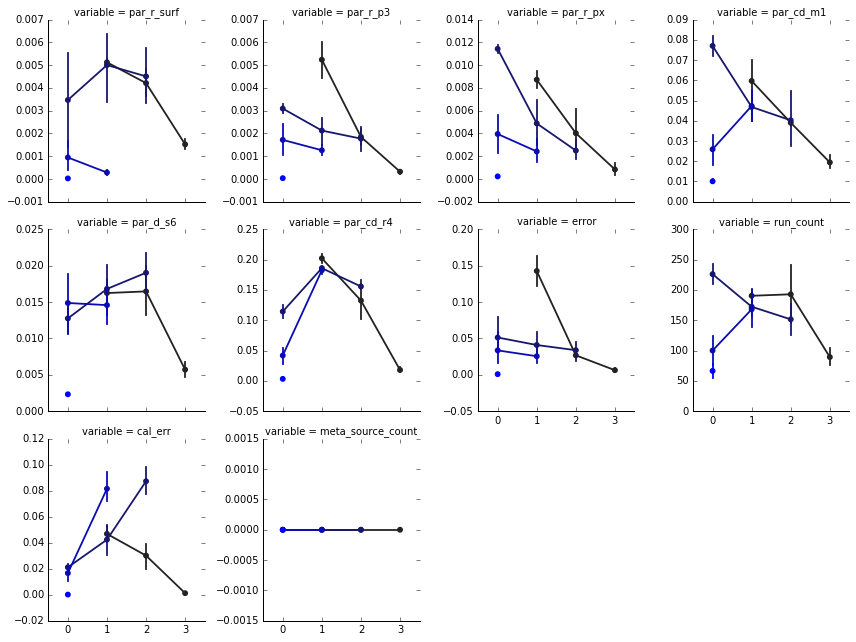

In [121]:
f = sns.FacetGrid(grouped_std, col="variable",  col_wrap=4, sharey=False)
f.map_dataframe(sns.pointplot, x='meta_count_trend', y='value', hue='meta_count_sensor')

In [122]:
grouped[['error']].median().join(grouped[['error']].min(), lsuffix='_median', rsuffix='_min')


error_median  \
type        meta_event_val meta_event_cal meta_count_sensor meta_count_trend                 
calibration Event 20       20             0                 1                     0.237004   
                                                            2                     0.196422   
                                                            3                     0.193394   
                                          1                 0                     0.182937   
                                                            1                     0.146348   
                                                            2                     0.177690   
                                          2                 0                     0.114030   
                                                            1                     0.132865   
                                          3                 0                     0.109423   
            Event 21       21             0                 1                     0.126541   
                                                            2                     0.137444   
                                                            3                     0.138517   
                                          1                 0                     0.102001   
                                                            1                     0.104602   
                                                            2                     0.100751   
                                          2                 0                     0.097885   
                                                            1                     0.085318   
                                          3                 0                     0.073324   
            Event 22       22             0                 2                     0.125670   
                                                            3                     0.123013   
                                          1                 1                     0.110244   
                                                            2                     0.113092   
                                          2                 0                     0.096081   
                                                            1                     0.105176   
                                          3                 0                     0.095808   
validation  Event 20       21             0                 1                     0.199392   
                                                            2                     0.191272   
                                                            3                     0.190732   
                                          1                 0                     0.155500   
                                                            1                     0.165965   
...                                                                                    ...   
            Event 23       22             1                 1                     0.097370   
                                                            2                     0.100799   
                                          2                 0                     0.075108   
                                                            1                     0.091004   
                                          3                 0                     0.074923   
            Event 24       20             0                 1                     0.373082   
                                                            2                     0.355279   
                                                            3                     0.303218   
                                          1                 0                     0.255722   
                                                            1                     0.227643   
                                    

In [123]:
data_filtered = data[ ~(data['meta_observations'].str.contains('s3_sensor'))]

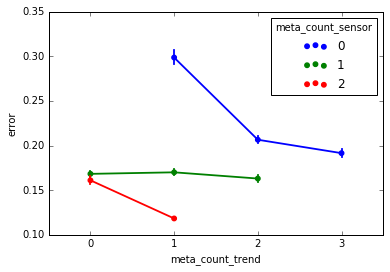

In [139]:
g = sns.pointplot(x='meta_count_trend', y='error', hue='meta_count_sensor', style='meta_event_val', data=data_filtered)

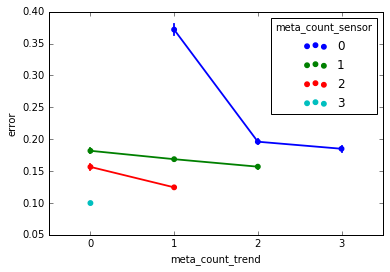

In [140]:
sns.pointplot(x='meta_count_trend', y='error', hue='meta_count_sensor', style='meta_event_val', data=data)

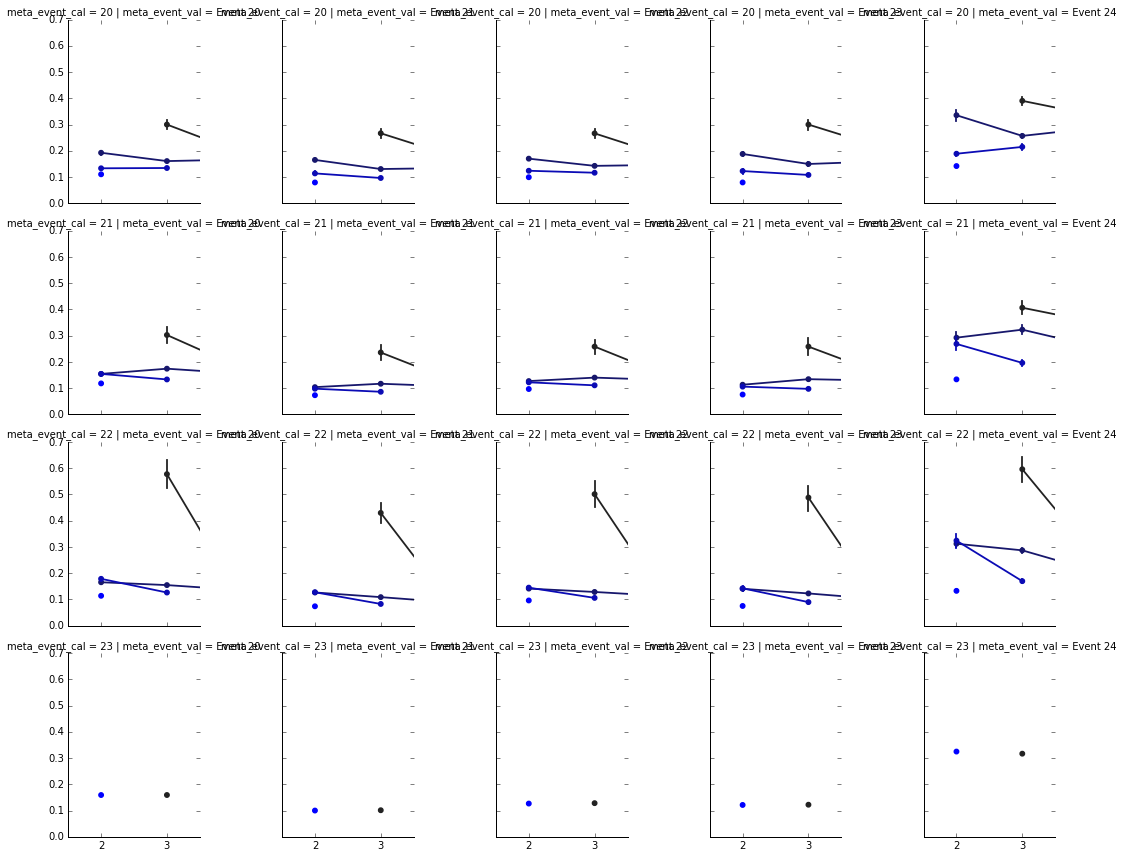

In [142]:
f = sns.FacetGrid(data, col="meta_event_val",  row="meta_event_cal")
f.map_dataframe(sns.pointplot, x='meta_count_trend', y='error', hue='meta_count_sensor')

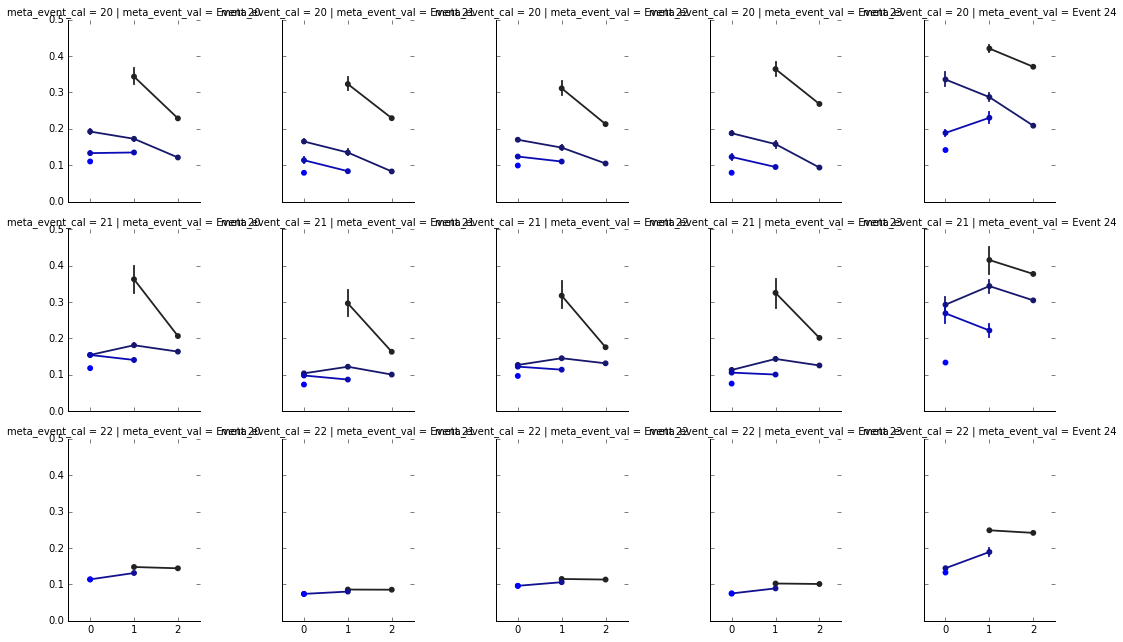

In [127]:
f = sns.FacetGrid(data[ ~(data['meta_observations'].str.contains('s3_trend'))], col="meta_event_val",  row="meta_event_cal")
f.map_dataframe(sns.pointplot, x='meta_count_trend', y='error', hue='meta_count_sensor')